Epoch 1/20
1/1 [==============================] - 1s 937ms/step - loss: 0.1250 - val_loss: 0.1228
Epoch 2/20
1/1 [==============================] - 0s 43ms/step - loss: 0.1228 - val_loss: 0.1204
Epoch 3/20
1/1 [==============================] - 0s 44ms/step - loss: 0.1204 - val_loss: 0.1172
Epoch 4/20
1/1 [==============================] - 0s 43ms/step - loss: 0.1172 - val_loss: 0.1126
Epoch 5/20
1/1 [==============================] - 0s 43ms/step - loss: 0.1126 - val_loss: 0.1064
Epoch 6/20
1/1 [==============================] - 0s 45ms/step - loss: 0.1064 - val_loss: 0.0988
Epoch 7/20
1/1 [==============================] - 0s 46ms/step - loss: 0.0988 - val_loss: 0.0896
Epoch 8/20
1/1 [==============================] - 0s 43ms/step - loss: 0.0896 - val_loss: 0.0796
Epoch 9/20
1/1 [==============================] - 0s 46ms/step - loss: 0.0796 - val_loss: 0.0708
Epoch 10/20
1/1 [==============================] - 0s 45ms/step - loss: 0.0708 - val_loss: 0.0680
Epoch 11/20
1/1 [===========

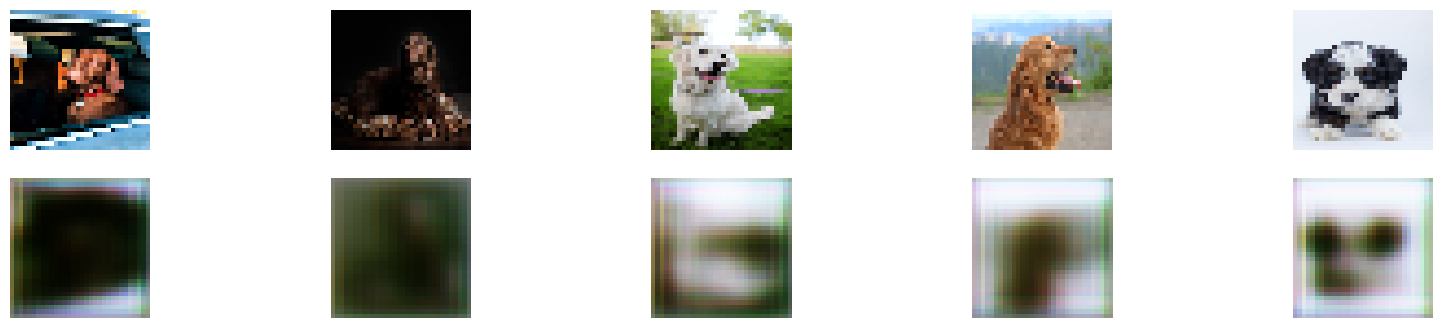

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Function to load and preprocess images from a folder
def load_images(folder_path, num_images):
    images = []
    image_files = random.sample(os.listdir(folder_path), num_images)

    for img_file in image_files:
        img_path = os.path.join(folder_path, img_file)
        img = image.load_img(img_path, target_size=(32, 32))
        img = image.img_to_array(img) / 255.0
        images.append(img)

    return np.array(images)

# Update folder_path to the correct path
folder_path = r'C:\Users\Kushagra Gupta\Desktop\Deep Learning Lab\imag'
num_images = 5
x_test_subset = load_images(folder_path, num_images)

# Define the autoencoder architecture
input_img = Input(shape=(32, 32, 3))  # Input shape for color images
encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)

decoded = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoded)

# Build the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')  # Using mean squared error as the loss for image reconstruction

# Train the autoencoder
autoencoder.fit(x_test_subset, x_test_subset, epochs=20, batch_size=128, shuffle=True, validation_data=(x_test_subset, x_test_subset))

# Evaluate the reconstruction performance on the subset
decoded_images = autoencoder.predict(x_test_subset)

# Plot original and reconstructed images
n = len(x_test_subset)  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_subset[i])
    plt.axis('off')

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i])
    plt.axis('off')

plt.show()


Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.0992 - val_loss: 0.0969
Epoch 2/20
1/1 [==============================] - 0s 71ms/step - loss: 0.0969 - val_loss: 0.0945
Epoch 3/20
1/1 [==============================] - 0s 76ms/step - loss: 0.0945 - val_loss: 0.0919
Epoch 4/20
1/1 [==============================] - 0s 76ms/step - loss: 0.0919 - val_loss: 0.0885
Epoch 5/20
1/1 [==============================] - 0s 77ms/step - loss: 0.0885 - val_loss: 0.0838
Epoch 6/20
1/1 [==============================] - 0s 76ms/step - loss: 0.0838 - val_loss: 0.0780
Epoch 7/20
1/1 [==============================] - 0s 77ms/step - loss: 0.0780 - val_loss: 0.0712
Epoch 8/20
1/1 [==============================] - 0s 77ms/step - loss: 0.0712 - val_loss: 0.0641
Epoch 9/20
1/1 [==============================] - 0s 80ms/step - loss: 0.0641 - val_loss: 0.0576
Epoch 10/20
1/1 [==============================] - 0s 79ms/step - loss: 0.0576 - val_loss: 0.0536
Epoch 11/20
1/1 [==============

AttributeError: 'MaxPooling2D' object has no attribute 'predict'

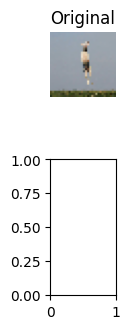

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Function to load and preprocess images from a folder
def load_images(folder_path, num_images):
    images = []
    image_files = random.sample(os.listdir(folder_path), num_images)

    for img_file in image_files:
        img_path = os.path.join(folder_path, img_file)
        img = image.load_img(img_path, target_size=(32, 32))
        img = image.img_to_array(img) / 255.0
        images.append(img)

    return np.array(images)

# Update folder_path to the correct path
folder_path = r'C:\Users\Kushagra Gupta\Desktop\Deep Learning Lab\imag'
num_images = 20
x_test_subset = load_images(folder_path, num_images)

# Define the autoencoder architecture
input_img = Input(shape=(32, 32, 3))  # Input shape for color images
encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)

decoded = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoded)

# Build the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')  # Using mean squared error as the loss for image reconstruction

# Train the autoencoder
autoencoder.fit(x_test_subset, x_test_subset, epochs=20, batch_size=128, shuffle=True, validation_data=(x_test_subset, x_test_subset))

# Evaluate the reconstruction performance on the subset
decoded_images = autoencoder.predict(x_test_subset)

# Plot original, encoded, and reconstructed images
n = len(x_test_subset)  # Number of images to display
plt.figure(figsize=(20, 6))

for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_subset[i])
    plt.axis('off')
    ax.set_title('Original')

    # Display encoded representations
    ax = plt.subplot(3, n, i + 1 + n)
    encoded_img = autoencoder.layers[4].predict(x_test_subset[i].reshape(1, 32, 32, 3))  # Layer at index 4 is the first Conv2D layer in the encoder
    plt.imshow(encoded_img.squeeze(), cmap='gray')
    plt.axis('off')
    ax.set_title('Encoded')

    # Display reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_images[i])
    plt.axis('off')
    ax.set_title('Reconstructed')

plt.show()


Epoch 1/20
1/1 [==============================] - 1s 814ms/step - loss: 0.1033 - val_loss: 0.1004
Epoch 2/20
1/1 [==============================] - 0s 75ms/step - loss: 0.1004 - val_loss: 0.0989
Epoch 3/20
1/1 [==============================] - 0s 75ms/step - loss: 0.0989 - val_loss: 0.0972
Epoch 4/20
1/1 [==============================] - 0s 75ms/step - loss: 0.0972 - val_loss: 0.0948
Epoch 5/20
1/1 [==============================] - 0s 74ms/step - loss: 0.0948 - val_loss: 0.0913
Epoch 6/20
1/1 [==============================] - 0s 79ms/step - loss: 0.0913 - val_loss: 0.0867
Epoch 7/20
1/1 [==============================] - 0s 75ms/step - loss: 0.0867 - val_loss: 0.0810
Epoch 8/20
1/1 [==============================] - 0s 78ms/step - loss: 0.0810 - val_loss: 0.0743
Epoch 9/20
1/1 [==============================] - 0s 77ms/step - loss: 0.0743 - val_loss: 0.0671
Epoch 10/20
1/1 [==============================] - 0s 78ms/step - loss: 0.0671 - val_loss: 0.0605
Epoch 11/20
1/1 [===========

TypeError: Invalid shape (8, 8, 64) for image data

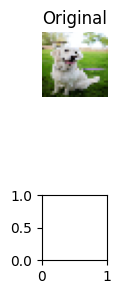

In [3]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

# Function to load and preprocess images from a folder
def load_images(folder_path, num_images):
    images = []
    image_files = random.sample(os.listdir(folder_path), num_images)

    for img_file in image_files:
        img_path = os.path.join(folder_path, img_file)
        img = image.load_img(img_path, target_size=(32, 32))
        img = image.img_to_array(img) / 255.0
        images.append(img)

    return np.array(images)

# Update folder_path to the correct path
folder_path = r'C:\Users\Kushagra Gupta\Desktop\Deep Learning Lab\imag'
num_images = 20
x_test_subset = load_images(folder_path, num_images)

# Define the autoencoder architecture
input_img = Input(shape=(32, 32, 3))  # Input shape for color images
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Build the autoencoder model
autoencoder = Model(input_img, decoded)

# Build the encoder model
encoder = Model(input_img, encoded)

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the autoencoder
autoencoder.fit(x_test_subset, x_test_subset, epochs=20, batch_size=128, shuffle=True, validation_data=(x_test_subset, x_test_subset))

# Evaluate the reconstruction performance on the subset
decoded_images = autoencoder.predict(x_test_subset)

# Get encoded representations
encoded_images = encoder.predict(x_test_subset)

# Plot original, encoded, and reconstructed images
n = len(x_test_subset)  # Number of images to display
plt.figure(figsize=(20, 6))

for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_subset[i])
    plt.axis('off')
    ax.set_title('Original')

    # Display encoded representations
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_images[i].reshape(8, 8, 64), cmap='gray')  # Corrected reshape
    plt.axis('off')
    ax.set_title('Encoded')


    # Display reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_images[i])
    plt.axis('off')
    ax.set_title('Reconstructed')

plt.show()
